In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sunspot is a region on the Sun’s surface (photo-sphere) that is marked by a lower temperature than its environment. These reduced temperatures are caused by concentrations of magnetic field flux that inhibit convection by an effect similar to eddy current brakes. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.


https://wwwbis.sidc.be/silso/home
       

(1758,) (1758,)
1910-05


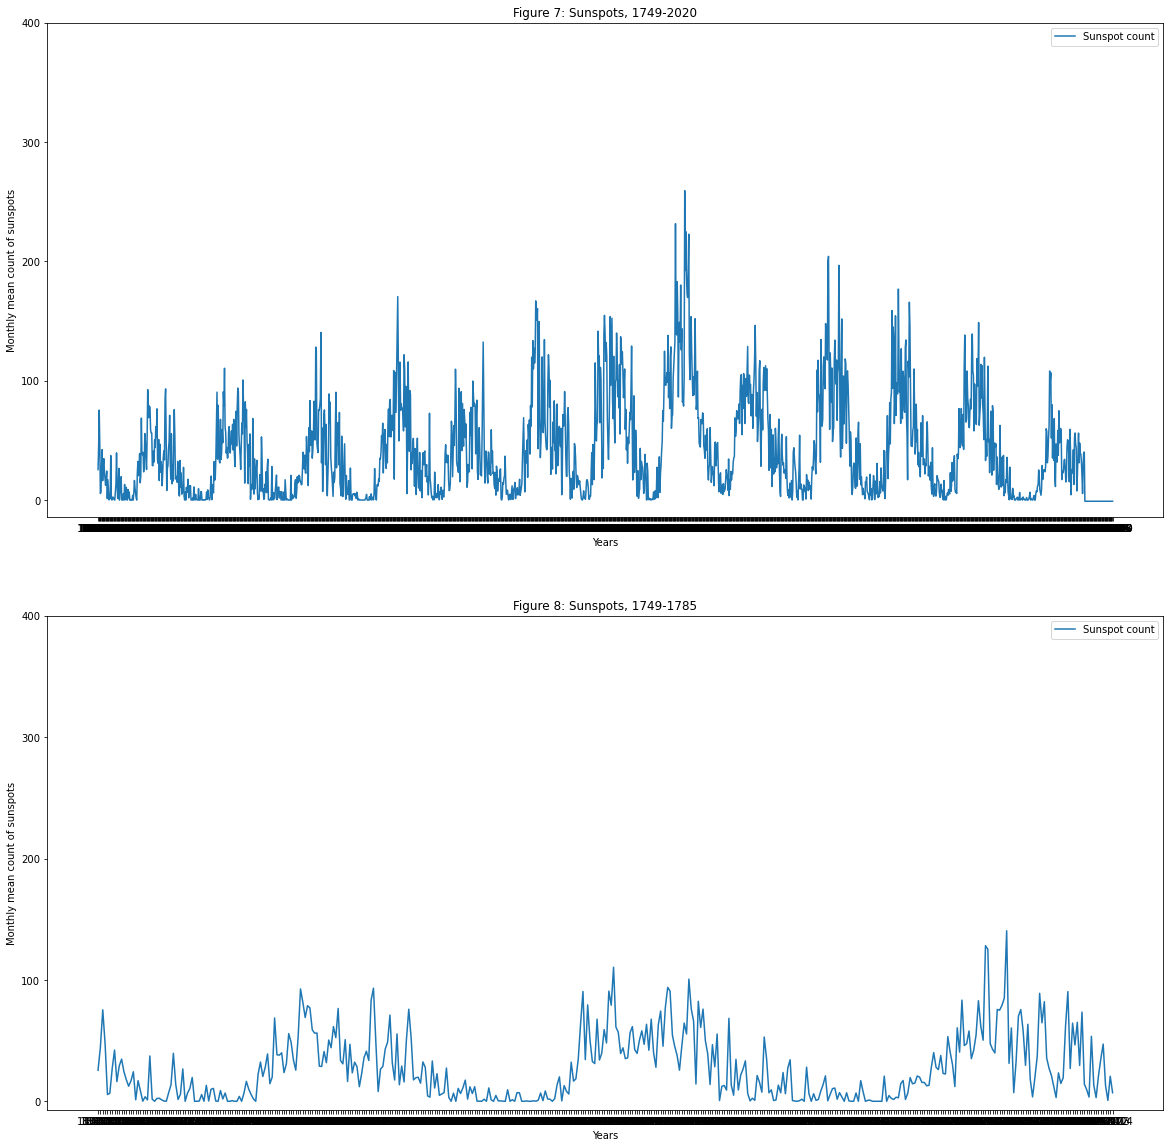

In [4]:
sunspots = np.loadtxt("/Users/sunitjadeja/Desktop/Sun_spot.txt", delimiter=';')
#sunspots=pd.read_csv("/Users/sunitjadeja/Desktop/TISS All Subject/Bayesian Statistics/Sun_spot.csv",encoding="unicode_escape")
#years is the third column
years = sunspots.iloc[:,0]
#activity is the 4th column
activity = sunspots.iloc[:,5] + 0.1
print(years.shape,activity.shape)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2,1,1)

ax.plot(years, activity, label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 7: Sunspots, 1749-2020")
ax.legend()


ax = fig.add_subplot(2,1,2)
print(years[432])
ax.plot(years[:432], activity[:432], label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 8: Sunspots, 1749-1785")
ax.legend()

# Plotting a histogram of sunspot counts

Text(0.5, 1.0, 'Figure 9: Histogram showing the frequency of sunspot counts over 270 years (1749-2020)')

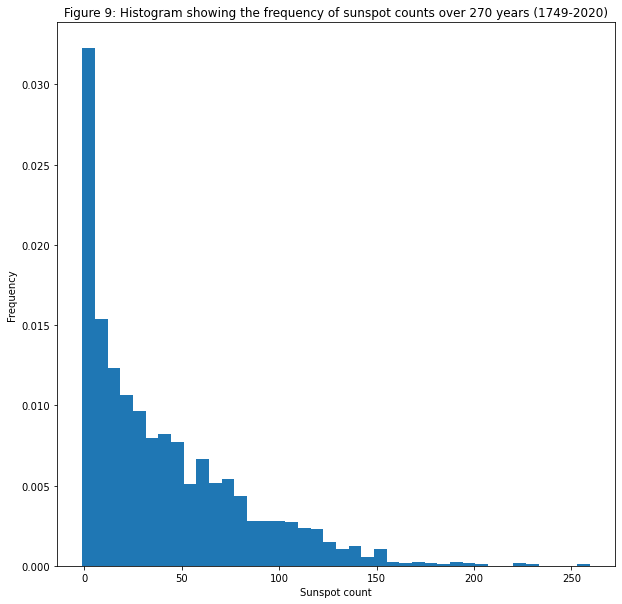

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(activity, bins=40, density=True)
ax.set_xlabel("Sunspot count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 9: Histogram showing the frequency of sunspot counts over 270 years (1749-2020)")

# Defining Gamma Function Manually & Through Math & Scipy Library
Shape & Scale Parameters 

A shape parameter is any parameter of a probability distribution that is neither a location parameter nor a scale parameter (nor a function of either or both of these only, such as a rate parameter). Such a parameter must affect the shape of a distribution rather than simply shifting it (as a location parameter does) or stretching/shrinking it (as a scale parameter does).


Scale parameter determines the "scale" or statistical dispersion of the probability distribution. If s is large, then the distribution will be more spread out; if s is small then it will be more concentrated.

In [9]:
transition_model = lambda x: np.random.normal(x,[0.05,5],(2,))
import math
def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))   

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

# Accepted & Rejected Parameter Values with 50000 iterations 

In [10]:
accepted, rejected = metropolis_hastings(manual_log_lik_gamma,prior,transition_model,[4, 10], 50000,activity,acceptance)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
print(accepted.shape)
accepted[-10:]

(9454, 2)


array([[ 0.6923345 , 60.76302775],
       [ 0.69866133, 60.15180564],
       [ 0.68976918, 60.01279804],
       [ 0.69614283, 60.846005  ],
       [ 0.72558323, 60.64401431],
       [ 0.70649627, 63.4509197 ],
       [ 0.72862034, 62.08705553],
       [ 0.69923392, 64.14678166],
       [ 0.69773439, 61.95443959],
       [ 0.69013623, 61.81834775]])

# Plotting the Figure 

Text(0.5, 1.0, 'Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.')

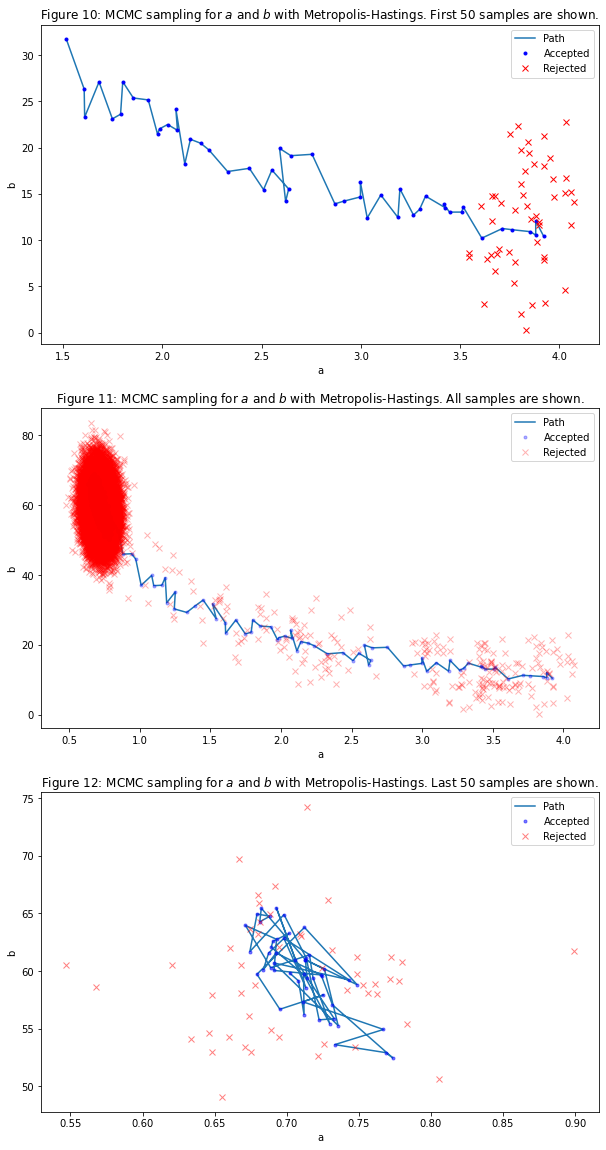

In [8]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 10: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. First 50 samples are shown.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 11: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. All samples are shown.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.") 

# Trace & Histogram for Parameters

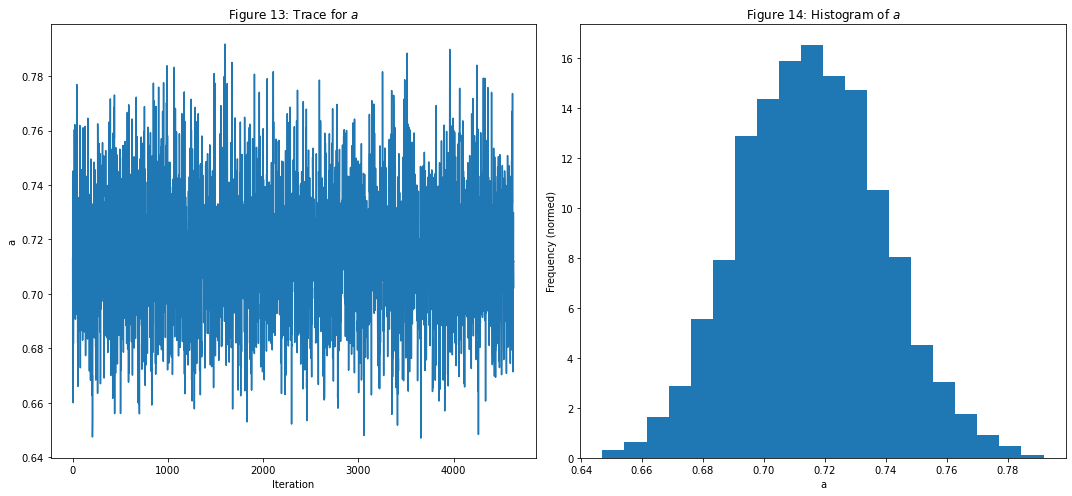

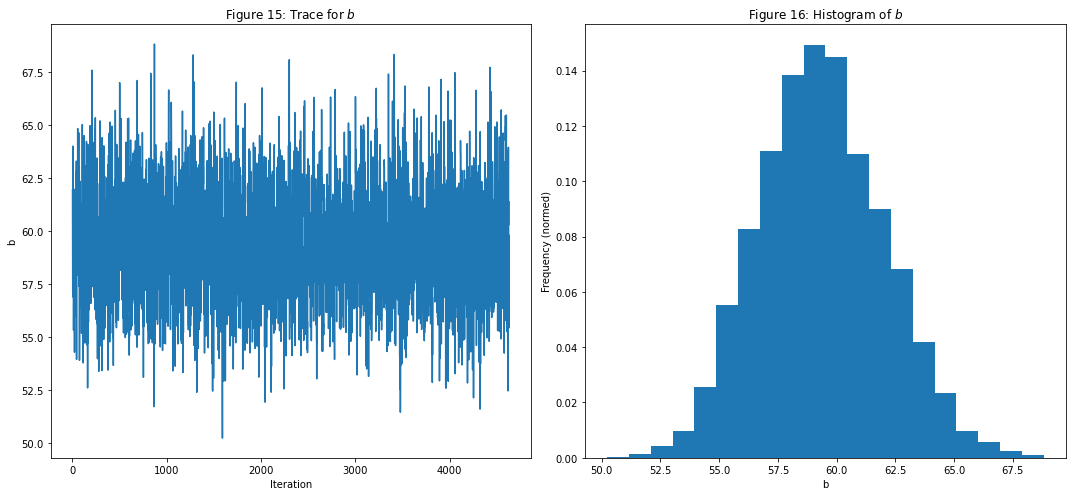

In [9]:
show=int(-0.5*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_title("Figure 13: Trace for $a$")
ax.set_xlabel("Iteration")
ax.set_ylabel("a")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("a")
ax.set_title("Figure 14: Histogram of $a$")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 15: Trace for $b$")
ax.set_xlabel("Iteration")
ax.set_ylabel("b")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("b")
ax.set_title("Figure 16: Histogram of $b$")
fig.tight_layout()

# Prediction Based on numpy random & Parameter values Last 50 Average

0.7156628000971027 59.276240831041996


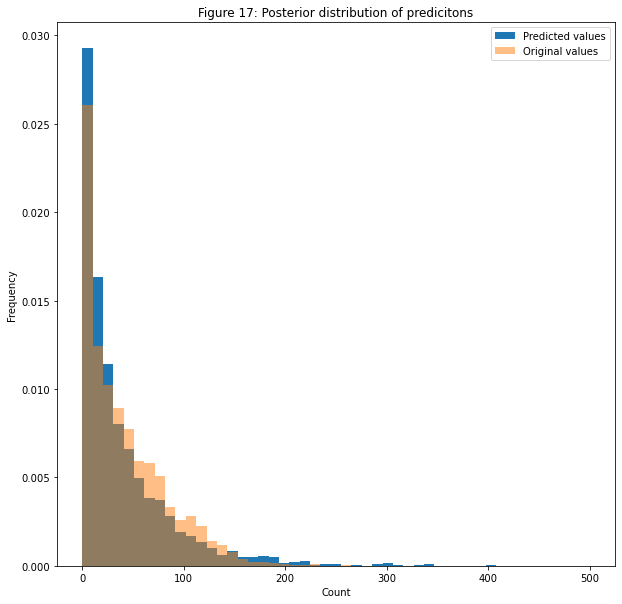

In [19]:
show=-int(0.5*accepted.shape[0])

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)
t=np.arange(activity.shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)



ax.hist( observation_gen,bins=np.linspace(0,500,50) ,density=True,label="Predicted values")
ax.hist( activity,bins=np.linspace(0,500,50) ,alpha=0.5,density=True, label="Original values")
ax.set_xlabel("Count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 17: Posterior distribution of predicitons")
ax.legend()

# Autocorrelation plotting

0.7156628000971027 59.276240831041996


[Text(0.5, 0, 'lag'), Text(0, 0.5, 'autocorrelation'), (-0.1, 1.0)]

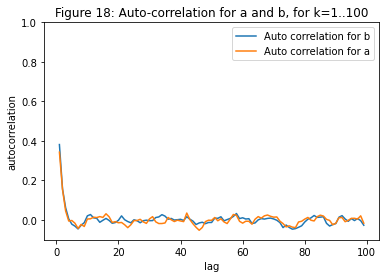

In [21]:
mean_acc_0=accepted[show:,0].mean()
mean_acc_1=accepted[show:,1].mean()
print(mean_acc_0,mean_acc_1)

lag=np.arange(1,100)
def autocorr(accepted,lag):
    num_0=0
    denom_0=0
    num_1=0
    denom_1=0
    for i in range(accepted.shape[0]-lag):
        num_0+=(accepted[i,0]-mean_acc_0)*(accepted[i+lag,0]-mean_acc_0)
        num_1+=(accepted[i,1]-mean_acc_1)*(accepted[i+lag,1]-mean_acc_1)
        denom_0+=(mean_acc_0-accepted[i,0])**2
        denom_1+=(mean_acc_1-accepted[i,1])**2
    rk_0=num_0/denom_0
    rk_1=num_1/denom_1
    return rk_0, rk_1


accepted_reversed=accepted[show:,:]
result=np.zeros((2,lag.shape[0]))
#print(lag)
for l in lag:
    result[:,l-1]=autocorr(accepted_reversed,l)
    
    
###Instead of writing an autocorrelation function, one could simply use thee autocorr function provided in pymc3    
#from pymc3.stats import autocorr

fig, ax = plt.subplots()
#ax.plot(lag, [autocorr(accepted[show:,1], l) for l in lags], label='auto b')
#ax.plot(lag, [autocorr(accepted[show:,0], l) for l in lags], label='auto a')
ax.plot(lag, result[1,:], label='Auto correlation for b')
ax.plot(lag, result[0,:], label='Auto correlation for a')
ax.legend(loc=0)
ax.set_title("Figure 18: Auto-correlation for a and b, for k=1..100")
ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))

# Autocorrealtion Durbin Watson

In [34]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result)


array([5.64344242e-03, 1.35396008e-04, 4.38807610e-02, 1.99325621e+00,
       7.76213143e-01, 1.77975981e-01, 1.53967852e-03, 1.47138007e-02,
       2.98692322e-01, 5.36685543e-01, 5.77591557e-01, 3.24489803e-02,
       6.03384656e-02, 1.91962865e+00, 1.20041174e+00, 5.17470396e-01,
       1.25102578e+00, 4.18554114e-02, 9.45114520e-02, 8.15152263e-01,
       1.87375809e+00, 1.13700733e+00, 6.21806991e-01, 1.27848792e-01,
       1.78717596e+00, 4.40727553e-02, 1.50226692e+00, 3.46571132e-01,
       9.12275749e-01, 1.86631277e+00, 1.31998711e+00, 1.94376248e+00,
       1.99242419e+00, 1.91435721e+00, 1.95865398e+00, 4.25255468e-01,
       6.84067752e-01, 9.77728133e-01, 1.73272572e+00, 1.97236145e+00,
       4.99312624e-01, 2.24665395e-01, 1.55107082e-01, 4.67875931e-01,
       1.08804399e-01, 4.73814252e-01, 4.54038830e-01, 2.69749047e-01,
       8.63238848e-01, 7.42547314e-01, 4.10464208e-02, 1.71974492e+00,
       3.23784594e-01, 2.94539948e-01, 1.25412661e+00, 1.47414692e-01,
      